<a href="https://colab.research.google.com/github/THANNAGA/generalized_Lotka_Volterra_Interactive_Activation/blob/main/gLIA_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchdiffeq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

## gLIA on word example, using torchdiffeq

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torchdiffeq import odeint
from torch.utils.data import TensorDataset, DataLoader  # Import DataLoader and TensorDataset

import matplotlib.pyplot as plt
import gc

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
full_wordlist = [
    "the", "of", "to", "and", "a", "in", "is", "it", "you", "that",
    "he", "was", "for", "on", "are", "with", "as", "I", "his", "they",
    "be", "at", "one", "have", "this", "from", "or", "had", "by", "not",
    "word", "but", "what", "some", "we", "can", "out", "other", "were", "all",
    "there", "when", "up", "use", "your", "how", "said", "an", "each", "she",
    "which", "do", "their", "time", "if", "will", "way", "about", "many", "then",
    "them", "write", "would", "like", "so", "these", "her", "long", "make", "thing",
    "see", "him", "two", "has", "look", "more", "day", "could", "go", "come",
    "did", "number", "sound", "no", "most", "people", "my", "over", "know", "water",
    "than", "call", "first", "who", "may", "down", "side", "been", "now", "find",
    "any", "new", "work", "part", "take", "get", "place", "made", "live", "where",
    "after", "back", "little", "only", "round", "man", "year", "came", "show", "every",
    "good", "me", "give", "our", "under", "name", "very", "through", "just", "form",
    "sentence", "great", "think", "say", "help", "low", "line", "differ", "turn", "cause",
    "much", "mean", "before", "move", "right", "boy", "old", "too", "same", "tell",
    "does", "set", "three", "want", "air", "well", "also", "play", "small", "end",
    "put", "home", "read", "hand", "port", "large", "spell", "add", "even", "land",
    "here", "must", "big", "high", "such", "follow", "act", "why", "ask", "men",
    "change", "went", "light", "kind", "off", "need", "house", "picture", "try", "us",
    "again", "animal", "point", "mother", "world", "near", "build", "self", "earth", "father",
    "head", "stand", "own", "page", "should", "country", "found", "answer", "school", "grow",
    "study", "still", "learn", "plant", "cover", "food", "sun", "four", "between", "state",
    "keep", "eye", "never", "last", "let", "thought", "city", "tree", "cross", "farm",
    "hard", "start", "might", "story", "saw", "far", "sea", "draw", "left", "late",
    "run", "dont", "while", "press", "close", "night", "real", "life", "few", "north",
    "open", "seem", "together", "next", "white", "children", "begin", "got", "walk", "example",
    "ease", "paper", "group", "always", "music", "those", "both", "mark", "often", "letter",
    "until", "mile", "river", "car", "feet", "care", "second", "book", "carry", "took",
    "science", "eat", "room", "friend", "began", "idea", "fish", "mountain", "stop", "once",
    "base", "hear", "horse", "cut", "sure", "watch", "color", "face", "wood", "main",
    "enough", "plain", "girl", "usual", "young", "ready", "above", "ever", "red", "list",
    "though", "feel", "talk", "bird", "soon", "body", "dog", "family", "direct", "pose",
    "leave", "song", "measure", "door", "product", "black", "short", "numeral", "class", "wind",
    "question", "happen", "complete", "ship", "area", "half", "rock", "order", "fire", "south",
    "problem", "piece", "told", "knew", "pass", "since", "top", "whole", "king", "space",
    "heard", "best", "hour", "better", "true", "during", "hundred", "five", "remember", "step",
    "early", "hold", "west", "ground", "interest", "reach", "fast", "verb", "sing", "listen",
    "six", "table", "travel", "less", "morning", "ten", "simple", "several", "vowel", "toward",
    "war", "lay", "against", "pattern", "slow", "center", "love", "person", "money", "serve",
    "appear", "road", "map", "rain", "rule", "govern", "pull", "cold", "notice", "voice",
    "unit", "power", "town", "fine", "certain", "fly", "fall", "lead", "cry", "dark",
    "machine", "note", "wait", "plan", "figure", "star", "box", "noun", "field", "rest",
    "correct", "able", "pound", "done", "beauty", "drive", "stood", "contain", "front", "teach",
    "week", "final", "gave", "green", "oh", "quick", "develop", "ocean", "warm", "free",
    "minute", "strong", "special", "mind", "behind", "clear", "tail", "produce", "fact", "street",
    "inch", "multiply", "nothing", "course", "stay", "wheel", "full", "force", "blue", "object",
    "decide", "surface", "deep", "moon", "island", "foot", "system", "busy", "test", "record",
    "boat", "common", "gold", "possible", "plane", "stead", "dry", "wonder", "laugh", "thousand",
    "ago", "ran", "check", "game", "shape", "equate", "hot", "miss", "brought", "heat",
    "snow", "tire", "bring", "yes", "distant", "fill", "east", "paint", "language", "among",
    "grand", "ball", "yet", "wave", "drop", "heart", "am", "present", "heavy", "dance",
    "engine", "position", "arm", "wide", "sail", "material", "size", "vary", "settle", "speak",
    "weight", "general", "ice", "matter", "circle", "pair", "include", "divide", "syllable", "felt",
    "perhaps", "pick", "sudden", "count", "square", "reason", "length", "represent", "art", "subject",
    "region", "energy", "hunt", "probable", "bed", "brother", "egg", "ride", "cell", "believe",
    "fraction", "forest", "sit", "race", "window", "store", "summer", "train", "sleep", "prove",
    "lone", "leg", "exercise", "wall", "catch", "mount", "wish", "sky", "board", "joy",
    "winter", "sat", "written", "wild", "instrument", "kept", "glass", "grass", "cow", "job",
    "edge", "sign", "visit", "past", "soft", "fun", "bright", "gas", "weather", "month",
    "million", "bear", "finish", "happy", "hope", "flower", "clothe", "strange", "gone", "jump",
    "baby", "eight", "village", "meet", "root", "buy", "raise", "solve", "metal", "whether",
    "push", "seven", "paragraph", "third", "shall", "held", "hair", "describe", "cook", "floor",
    "either", "result", "burn", "hill", "safe", "cat", "century", "consider", "type", "law",
    "bit", "coast", "copy", "phrase", "silent", "tall", "sand", "soil", "roll", "temperature",
    "finger", "industry", "value", "fight", "lie", "beat", "excite", "natural", "view", "sense",
    "ear", "else", "quite", "broke", "case", "middle", "kill", "son", "lake", "moment",
    "scale", "loud", "spring", "observe", "child", "straight", "consonant", "nation", "dictionary", "milk",
    "speed", "method", "organ", "pay", "age", "section", "dress", "cloud", "surprise", "quiet",
    "stone", "tiny", "climb", "cool", "design", "poor", "lot", "experiment", "bottom", "key",
    "iron", "single", "stick", "flat", "twenty", "skin", "smile", "crease", "hole", "trade",
    "melody", "trip", "office", "receive", "row", "mouth", "exact", "symbol", "die", "least",
    "trouble", "shout", "except", "wrote", "seed", "tone", "join", "suggest", "clean", "break",
    "lady", "yard", "rise", "bad", "blow", "oil", "blood", "touch", "grew", "cent",
    "mix", "team", "wire", "cost", "lost", "brown", "wear", "garden", "equal", "sent",
    "choose", "fell", "fit", "flow", "fair", "bank", "collect", "save", "control", "decimal",
    "gentle", "woman", "captain", "practice", "separate", "difficult", "doctor", "please", "protect", "noon",
    "whose", "locate", "ring", "character", "insect", "caught", "period", "indicate", "radio", "spoke",
    "atom", "human", "history", "effect", "electric", "expect", "crop", "modern", "element", "hit",
    "student", "corner", "party", "supply", "bone", "rail", "imagine", "provide", "agree", "thus",
    "capital", "wont", "chair", "danger", "fruit", "rich", "thick", "soldier", "process", "operate",
    "guess", "necessary", "sharp", "wing", "create", "neighbor", "wash", "bat", "rather", "crowd",
    "corn", "compare", "poem", "string", "bell", "depend", "meat", "rub", "tube", "famous",
    "dollar", "stream", "fear", "sight", "thin", "triangle", "planet", "hurry", "chief", "colony",
    "clock", "mine", "tie", "enter", "major", "fresh", "search", "send", "yellow", "gun",
    "allow", "print", "dead", "spot", "desert", "suit", "current", "lift", "rose", "continue",
    "block", "chart", "hat", "sell", "success", "company", "subtract", "event", "particular", "deal",
    "swim", "term", "opposite", "wife", "shoe", "shoulder", "spread", "arrange", "camp", "invent",
    "cotton", "born", "determine", "quart", "nine", "truck", "noise", "level", "chance", "gather",
    "shop", "stretch", "throw", "shine", "property", "column", "molecule", "select", "wrong", "gray",
    "repeat", "require", "broad", "prepare", "salt", "nose", "plural", "anger", "claim", "continent",
    "oxygen", "sugar", "death", "pretty", "skill", "women", "season", "solution", "magnet", "silver",
    "thank", "branch", "match", "suffix", "especially", "fig", "afraid", "huge", "sister", "steel",
    "discuss", "forward", "similar", "guide", "experience", "score", "apple", "bought", "led", "pitch",
    "coat", "mass", "card", "band", "rope", "slip", "win", "dream", "evening", "condition",
    "feed", "tool", "total", "basic", "smell", "valley", "nor", "double", "seat", "arrive",
    "master", "track", "parent", "shore", "division", "sheet", "substance", "favor", "connect", "post",
    "spend", "chord", "fat", "glad", "original", "share", "station", "dad", "bread", "charge",
    "proper", "bar", "offer", "segment", "slave", "duck", "instant", "market", "degree", "populate",
    "chick", "dear", "enemy", "reply", "drink", "occur", "support", "speech", "nature", "range",
    "steam", "motion", "path", "liquid", "log", "meant", "quotient", "teeth", "shell", "neck"
]

In [ ]:
import requests

def loadWords1(numwords=10, lenwords=1):
  # Filter words longer than lenwords and take at most k of them
  wordlist = [word for word in full_wordlist if len(word) > lenwords][:numwords]
  return wordlist

def loadWords2(filename='Lagrangian/1000TopFreqEnglishWords.txt', start=0, numwords=10, lenwords=1):
  with open(filename) as f:
    wordlist = []
    for line in f:
        w = line.strip()
        if len(w) > lenwords:
          wordlist.append(w)
  return wordlist[start: start+numwords]

def buildLetters(wordlist):
  allletters = []
  for i, word in enumerate(wordlist):
    letters = [let+str(j+1) for j, let in enumerate(word)]
    allletters += letters
  letterlist = sorted(list(set(allletters)))
  return letterlist

def buildList(numwords=10, lenwords=2):
  wordlist = loadWords1(numwords=numwords, lenwords=lenwords)
  #wordlist = loadWords2(numwords=numwords, lenwords=lenwords)
  #wordlist = ['the', 'of', 'to', 'you', 'and', 'a', 'in', 'is', 'it', 'that', 'what', 'sure']
  letterlist = buildLetters(wordlist)
  return wordlist, letterlist + wordlist


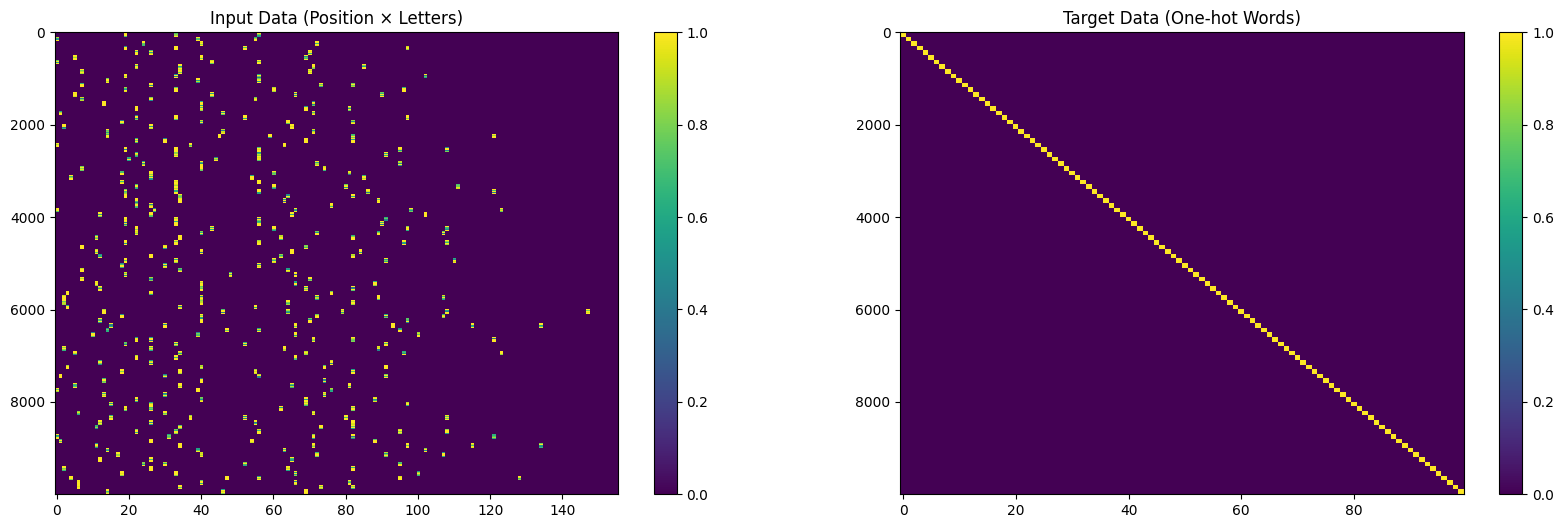

inputs.shape torch.Size([10000, 156])
targets.shape torch.Size([10000, 100])


In [ ]:
# Lexicon and setup
n_words = 100
n_exemplars_per_word = 100
batchsize = 2000
words, tokens = buildList(numwords=n_words); n = len(tokens)
lexicon = words
n_letters = 26  # A-Z
max_word_length = max(len(word) for word in lexicon)  # Get max word length
n_positions = max_word_length  # Number of position slots
input_size = n_positions * n_letters  # Total input size
letter_to_idx = {chr(65+i): i for i in range(26)}  # A=0, B=1, ..., Z=25

def generate_exemplars(n_exemplars_per_word=5, show=False):
    inputs = []
    targets = []

    for word_idx, word in enumerate(lexicon):
        for _ in range(n_exemplars_per_word):
            # Create input tensor with position-specific letter encoding
            input_vector = torch.zeros(1, input_size)  # [1, n_positions * n_letters]
            for pos, letter in enumerate(word.upper()):
                letter_idx = letter_to_idx[letter]
                # Calculate the position in the flat vector
                vector_idx = pos * n_letters + letter_idx
                scale = torch.rand(1) * 1.0 + 0.5
                noise = torch.randn(1) * 0.1
                value = max(0, min(1, 1.0 * scale + noise))
                input_vector[0, vector_idx] = value

            inputs.append(input_vector)

            # Create one-hot target
            target = torch.zeros(n_words)
            target[word_idx] = 1.0
            targets.append(target)

    inputs = torch.cat(inputs, dim=0).to(device)
    targets = torch.stack(targets).to(device)

    if show:
        fig, ax = plt.subplots(ncols=2, figsize=(20, 6))

        # Input data
        cax = ax[0].imshow(inputs.cpu().numpy(), cmap='viridis', aspect='auto', interpolation='none')
        fig.colorbar(cax, ax=ax[0])
        ax[0].set_title('Input Data (Position × Letters)')

        # Target data
        cax = ax[1].imshow(targets.cpu().numpy(), cmap='viridis', aspect='auto', interpolation='none')
        fig.colorbar(cax, ax=ax[1])
        ax[1].set_title('Target Data (One-hot Words)')

        plt.show()

    return inputs, targets

# Generate and split data
inputs, targets = generate_exemplars(n_exemplars_per_word, show=True)

print('inputs.shape', inputs.shape)
print('targets.shape', targets.shape)

total_exemplars = inputs.shape[0]
indices = torch.randperm(total_exemplars)
train_size = int(0.7 * total_exemplars)
train_indices = indices[:train_size]
test_indices = indices[train_size:]
train_inputs, train_targets = inputs[train_indices], targets[train_indices]
test_inputs, test_targets = inputs[test_indices], targets[test_indices]

# Create TensorDataset
train_dataset = TensorDataset(train_inputs, train_targets)
test_dataset = TensorDataset(test_inputs, test_targets)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batchsize, shuffle=True)  # Set batch_size and shuffle
test_loader = DataLoader(test_dataset, batch_size=batchsize, shuffle=False)  # No shuffling for testing



In [ ]:
class GLV_Sym(nn.Module):
  def __init__(self):
      super(GLV_Sym, self).__init__()
      small = 1 / (1000 * n)
      #small = 1 / (n**2)
      self.r = torch.ones(input_size + n_words, device=device) * 0.1

      # Trainable lower triangular matrix
      n_total = input_size + n_words
      #self.A = -0.001*torch.ones(n_total, n_total, device=device)
      self.A = -0.0001*torch.ones(n_total, n_total, device=device)
      #self.A = -0.00001*torch.ones(n_total, n_total, device=device)
      for i, word in enumerate(lexicon):
          word_idx = n_letters + i
          for p, letter in enumerate(word):
              letter = letter.upper()
              letter_idx = letter_to_idx[letter] + p * 26
              if letter_idx <= word_idx:
                  self.A[word_idx, letter_idx] = small
              if word_idx <= letter_idx:
                  self.A[letter_idx, word_idx] = small
      for i in range(n_words):
          for j in range(n_words):
              if i != j and (n_letters + j) <= (n_letters + i):
                  self.A[n_letters + i, n_letters + j] = -5 * small

      self.lower_A = nn.Parameter(torch.tril(self.A, diagonal=-1))

  def forward(self, t, x):
      # Construct full A on the fly: lower_A + transposed lower_A minus diagonal overlap
      A = self.lower_A + self.lower_A.t() - torch.diag(self.lower_A.diagonal())
      interaction = torch.matmul(x, A)
      dx_dt = x * (self.r + interaction)
      return dx_dt


# GLV Model (without symmetry)
class GLV(nn.Module):
  def __init__(self):
      super(GLV, self).__init__()
      small = 1 / (1000 * n)
      self.r = torch.ones(input_size + n_words, device=device) * 0.1
      n_total = input_size + n_words
      A = torch.zeros(n_total, n_total, device=device)
      for i, word in enumerate(lexicon):
          word_idx = n_letters + i
          for p, letter in enumerate(word):
              letter = letter.upper()
              letter_idx = letter_to_idx[letter] + p * 26
              A[word_idx, letter_idx] = small
              A[letter_idx, word_idx] = small
      for i in range(n_words):
          for j in range(n_words):
              if i != j:
                  A[n_letters + i, n_letters + j] = -5 * small
      self.A = nn.Parameter(A)

  def forward(self, t, x):

      interaction = torch.matmul(x, self.A)
      dx_dt = x * (self.r + interaction)  # All tensors on the same device
      return dx_dt


# IA Model
class IAM(nn.Module):
  def __init__(self):
      super(IAM, self).__init__()
      small = 1 / (1000 * n)
      self.r = torch.ones(input_size + n_words, device=device) * 0.1
      n_total = input_size + n_words
      A = torch.zeros(n_total, n_total, device=device)
      for i, word in enumerate(lexicon):
          word_idx = n_letters + i
          for p, letter in enumerate(word):
              letter = letter.upper()
              letter_idx = letter_to_idx[letter] + p * 26
              A[word_idx, letter_idx] = small
              A[letter_idx, word_idx] = small
      for i in range(n_words):
          for j in range(n_words):
              if i != j:
                  A[n_letters + i, n_letters + j] = -5 * small
      self.A = nn.Parameter(A)

  def forward(self, t, x):
      """
      Implements Interactive Activation model dynamics:
      - Bidirectional excitation between connected units (letters and words)
      - Lateral inhibition between words
      - Activation bounded between 0 and 1 using a logistic function
      """
      # Calculate net input from interactions
      net_input = torch.matmul(x, self.A)

      # Add decay term (typically negative to prevent runaway activation)
      decay = -0.1 * x  # Decay rate of -0.1 as per typical IA model

      # Calculate activation update
      # In IA model, rate of change depends on whether activation is increasing or decreasing
      excitation = (1.0 - x) * torch.relu(net_input)  # If net input is positive
      inhibition = x * torch.relu(-net_input)        # If net input is negative

      # Total change combines growth, decay, and interactions
      dx_dt = self.r * (excitation - inhibition) + decay

      # Ensure numerical stability
      #dx_dt = torch.clamp(dx_dt, -1.0, 1.0)

      return dx_dt

In [ ]:
Symmetric = True
mode = "IA"
#mode = "gLIA"

# Choice of model
if mode == "gLIA":
  if Symmetric:
    model = GLV_Sym().to(device)
  else:
    model = GLV().to(device)

if mode == "IA":
  model = IAM().to(device)

In [ ]:
def compute_accuracy(model, data_loader, t):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_inputs, batch_targets in data_loader:
            batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
            initial_words = torch.ones(batch_inputs.size(0), n_words, device=device) * 0.1  # Initialize on device
            initial_states = torch.cat([batch_inputs, initial_words], dim=1)  # Concatenate on device
            solution = odeint(model, initial_states, t, method='rk4')
            final_state = solution[-1]
            _, a_w_final = final_state.split([input_size, n_words], dim=1)
            predicted = torch.argmax(a_w_final, dim=1)
            true = torch.argmax(batch_targets, dim=1)
            correct += (predicted == true).float().sum().item()
            total += batch_targets.size(0)
    return 100 * correct / total


In [ ]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

# Training loop
train_accs = []
test_accs = []
if Symmetric:
  alpha = 0.1
  l_rate = 0.001   #up to n = 200
  #l_rate = 0.0001   #for n = 200
  #l_rate = 0.00001 #for n=500 or 1000
  epochs = 200
  time_steps = 10
  t = torch.linspace(0., 1., time_steps).to(device)

if (not Symmetric) or (mode == "IA"):
  alpha = 0.1
  l_rate = 0.001
  epochs = 200
  time_steps = 50
  t = torch.linspace(0., 10., time_steps).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=l_rate)  # Initialize optimizer here

model.eval()
train_acc = compute_accuracy(model, train_loader, t)
test_acc = compute_accuracy(model, test_loader, t)
train_accs.append(train_acc)
test_accs.append(test_acc)
print("Pre-training accuracies, "f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

def negative_definite_penalty(A, show=False):
    """Calculates a penalty if the matrix A is not negative definite, ensuring a real penalty."""
    if show:
      print (A)
      plt.imshow(A.cpu().detach().numpy())
      plt.colorbar()
      plt.show()
    eigvals, _ = torch.linalg.eigh(A)
    # Filter for real eigenvalues (using isfinite to avoid NaNs):
    real_eigvals = eigvals[torch.isfinite(eigvals)]
    # Penalty is the sum of positive real eigenvalues:
    nd_penalty = torch.sum(torch.clamp(real_eigvals, min=0))
    return nd_penalty

def train(model, train_loader, epochs, t):
    model.train()
    for epoch in range(epochs):

        gc.collect()
        for batch_inputs, batch_targets in train_loader:
            batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
            optimizer.zero_grad()
            initial_words = torch.ones(batch_inputs.size(0), n_words, device=device) * 0.1
            initial_states = torch.cat([batch_inputs, initial_words], dim=1)
            solution = odeint(model, initial_states, t, method='rk4')
            final_state = solution[-1]
            _, a_w_final = final_state.split([input_size, n_words], dim=1)
            loss = nn.MSELoss()(a_w_final, batch_targets)
            #loss = nn.CrossEntropyLoss()(a_w_final, torch.argmax(batch_targets, dim=1))
            nd_penalty = negative_definite_penalty(model.A)
            loss = loss + alpha * nd_penalty
            loss.backward()
            optimizer.step()


        if epoch % 20 == 0 or epoch == epochs - 1:
            model.eval()
            train_acc = compute_accuracy(model, train_loader, t)
            test_acc = compute_accuracy(model, test_loader, t)
            train_accs.append(train_acc)
            test_accs.append(test_acc)
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}, ND Penalty: {nd_penalty.item():.4f}, "
                  f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

            model.train()

# Run training
train(model, train_loader, epochs=epochs, t=t)

Pre-training accuracies, Train Acc: 0.9143, Test Acc: 1.2000
Epoch 0, Loss: 0.0213, ND Penalty: 0.1073, Train Acc: 96.9429, Test Acc: 96.5333
Epoch 20, Loss: 0.0108, ND Penalty: 0.0022, Train Acc: 91.1143, Test Acc: 89.0333
Epoch 40, Loss: 0.0105, ND Penalty: 0.0000, Train Acc: 88.4143, Test Acc: 85.8000
Epoch 60, Loss: 0.0106, ND Penalty: 0.0012, Train Acc: 93.6429, Test Acc: 92.5000
Epoch 80, Loss: 0.0104, ND Penalty: 0.0000, Train Acc: 94.6000, Test Acc: 94.5333
Epoch 100, Loss: 0.0104, ND Penalty: 0.0007, Train Acc: 95.6429, Test Acc: 94.1667
Epoch 120, Loss: 0.0102, ND Penalty: 0.0000, Train Acc: 95.2286, Test Acc: 94.7333
Epoch 140, Loss: 0.0102, ND Penalty: 0.0000, Train Acc: 96.6571, Test Acc: 96.1333
Epoch 160, Loss: 0.0101, ND Penalty: 0.0000, Train Acc: 97.1571, Test Acc: 96.7000
Epoch 180, Loss: 0.0100, ND Penalty: 0.0000, Train Acc: 97.7429, Test Acc: 97.0667
Epoch 199, Loss: 0.0099, ND Penalty: 0.0000, Train Acc: 97.7714, Test Acc: 97.0667


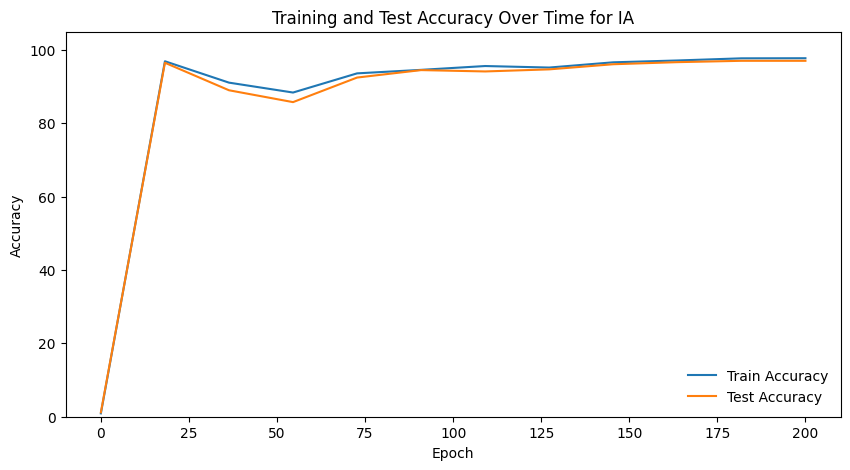

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, epochs, len(train_accs)), train_accs, label="Train Accuracy")
plt.plot(np.linspace(0, epochs, len(test_accs)), test_accs, label="Test Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0,105)

plt.legend(frameon=False)
plt.title("Training and Test Accuracy Over Time for "+mode)
plt.show()

In [ ]:
gc.collect()

3665

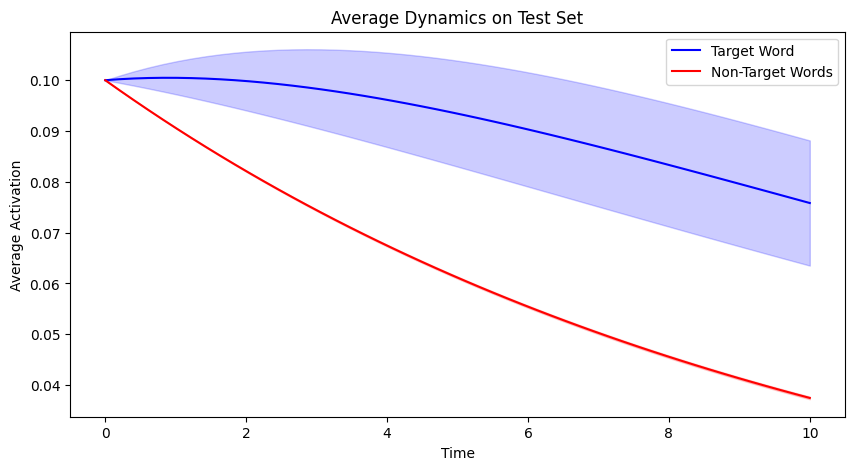

In [ ]:
import numpy as np

# Plot: Average dynamics on test set
model.eval()

target_activations_all = []
nontarget_activations_all = []

with torch.no_grad():
    for batch_inputs, batch_targets in test_loader:
        batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
        batch_size = batch_inputs.size(0)
        initial_words = torch.ones(batch_size, n_words, device=device) * 0.1  # Initialize on device
        initial_states = torch.cat([batch_inputs, initial_words], dim=1)  # Concatenate on device
        solution = odeint(model, initial_states, t, method='rk4')
        _, a_w_all = solution.split([input_size, n_words], dim=2)  # Shape: (50, batch_size, n_words)

        # Convert to numpy for easier manipulation
        a_w_all = a_w_all.cpu().detach().numpy()  # (50, batch_size, n_words)
        true_indices = torch.argmax(batch_targets, dim=1).cpu().numpy()  # Target word indices

        # Separate target and non-target activations for this batch
        target_activations = np.zeros((time_steps, batch_size))  # (time_steps, batch_size)
        nontarget_activations = np.zeros((time_steps, batch_size))  # (time_steps, batch_size)
        for i in range(batch_size):
            target_idx = true_indices[i]
            target_activations[:, i] = a_w_all[:, i, target_idx]
            nontarget_mask = np.ones(n_words, dtype=bool)
            nontarget_mask[target_idx] = False
            nontarget_activations[:, i] = a_w_all[:, i, nontarget_mask].mean(axis=1)

        # Append activations from this batch to the overall lists
        target_activations_all.append(target_activations)
        nontarget_activations_all.append(nontarget_activations)

# Concatenate activations from all batches
target_activations_all = np.concatenate(target_activations_all, axis=1)  # (time_steps, total_test_samples)
nontarget_activations_all = np.concatenate(nontarget_activations_all, axis=1)  # (time_steps, total_test_samples)

# Compute mean and std across all test exemplars
target_mean = np.mean(target_activations_all, axis=1)
target_std = np.std(target_activations_all, axis=1)
nontarget_mean = np.mean(nontarget_activations_all, axis=1)
nontarget_std = np.std(nontarget_activations_all, axis=1)

# Plot average dynamics
plt.figure(figsize=(10, 5))
t_np = t.cpu().numpy()
plt.plot(t_np, target_mean, label="Target Word", color='blue')
plt.fill_between(t_np, target_mean - target_std, target_mean + target_std, color='blue', alpha=0.2)
plt.plot(t_np, nontarget_mean, label="Non-Target Words", color='red')
plt.fill_between(t_np, nontarget_mean - nontarget_std, nontarget_mean + nontarget_std, color='red', alpha=0.2)
plt.xlabel("Time")
plt.ylabel("Average Activation")
plt.legend()
plt.title("Average Dynamics on Test Set")
plt.show()

For the gLIA symmetric set-up, after training is done, let's make the weight matrix negative definite and test performance

In [ ]:
if (mode == "gLIA") and Symmetric:

  #test whether weight matrix is neg. def.
  def is_negative_definite(matrix):
      """Checks if a matrix is negative definite."""
      # Assuming matrix is symmetric
      eigvals, _ = np.linalg.eigh(matrix)
      # All eigenvalues must be negative (or non-positive for negative semi-definite)
      return all(eigvals <= 0)
  """
  def is_negative_definite(matrix):
      matrix = np.asarray(matrix)
      if not np.allclose(matrix, matrix.T):
          return False
      return np.linalg.eigvalsh(matrix)[-1] < 0
  """
  def adjust_eigen(A):
    # adjust diagonal for negative real parts of all eigenvalues
    eigenvalues = np.linalg.eigvals(A)
    max_real_part = np.max(eigenvalues.real)
    print('max_real_part', max_real_part)
    if max_real_part > 0:
      A = A - 1.001*max_real_part * np.eye(A.shape[0])
    return A


  def check_matrix_conditions(matrix, verbose=True):
    # Check if the matrix satisfies the conditions

    sym_condition = np.allclose(matrix, matrix.T)

    eigenvalues = np.linalg.eigvals(matrix)
    eigenvalues_real_parts = np.real(eigenvalues)
    row_sums = matrix.sum(axis=1)

    # All eigenvalues have negative real parts
    eigenvalues_condition = np.all(eigenvalues_real_parts < 0)

    # The sum of each row is negative
    row_sums_condition = np.all(row_sums < 0)

    # The matrix contains positive elements
    positive_elements_condition = np.any(matrix > 0)

    if verbose:
      print ('\n\nThe matrix is symmetric:', sym_condition)
      print ('The matrix is negative definite:', is_negative_definite(matrix))
      print ('All eigenvalues have negative real parts:', eigenvalues_condition)
      print ('The sum of each row is negative:', row_sums_condition)
      print ('The matrix contains positive elements:', positive_elements_condition)


    return eigenvalues_condition, row_sums_condition, positive_elements_condition

  #----

  # Get the weight matrix
  lower_A = model.lower_A.detach().cpu().numpy()
  A = lower_A + lower_A.T - np.diag(lower_A.diagonal())

  # Check if it's negative definite
  if is_negative_definite(A):
      print("\n\nThe weight matrix is negative definite.")
  else:
      print("\n\nThe weight matrix is NOT negative definite, let's make it so.")
      #make weight matrix def. neg. after training is complete:
      A = adjust_eigen(A)
      if is_negative_definite(A):
        print("The weight matrix is now negative definite.")

  check_matrix_conditions(A)

In [ ]:
if (mode == "gLIA") and Symmetric:

  # put back weights in model, compute test performance with this weight matrix
  model.lower_A.data = torch.from_numpy(np.tril(A)).type(torch.float32).to(device)
  model.eval()
  test_acc = compute_accuracy(model, test_loader, t)
  print(f"Test Acc: {test_acc:.4f}")

| Words | Samples  | Epochs | Units | Parameters | Parameters n(n+1)/2 | Test Acc. (%) gLIA | Test Acc. (%) gLIA Sym. | Test Acc. (%) gLIA Neg. Def. | Test Acc. (%) IA |
|-------|----------|--------|-------|------------|---------------------|---------------------|-------------------------|------------------------------|------------------|
| 10    | 1,000    | 200    | 114   | 12,996     | 6,555              | 100.00             | 100.00                  | 100.00                       | 100.00           |
| 20    | 2,000    | 200    | 144   | 20,736     | 10,440             | 100.00             | 100.00                  | 98.87                        | 100.00           |
| 30    | 3,000    | 200    | 160   | 25,600     | 12,880             | 100.00             | 100.00                  | 96.67                        | 96.33            |
| 100   | 10,000   | 200    | 181   | 32,761     | 16,471             | 100.00             | 100.00                  | 100.00                       | 98.67            |
| 200   | 20,000   | 200    | 310   | 96,100     | 48,205             | 86.17              | 94.10                   | 90.28                        | 74.67            |
| 500   | 500,000  | 200    | 708   | 501,264    | 251,586            | 36.94              | 89.88                   | 89.74                        | 5.66             |
| 1000  | 1,000,000| 200    | 1157  | 1,338,149  | 669,903            | 20.41              | 91.69                   | 90.34                        | 0.30             |

*Note: For "gLIA Sym." and "gLIA Neg. Def.", the number of parameters is calculated as n(n+1)/2, where n is the number of units.*

Figure showing the model's state evolution along with its Lyapunov function in the Negative Definite weight matrix case

In [ ]:
if (mode == "gLIA") and Symmetric:

  def LyapunovNegDef(x=None, x_hat=None):
    L = np.zeros(x.shape[0])
    for t in range(x.shape[0]):
      L[t] = -r.T @ x[t] - 0.5 * x[t].T @ A @ x[t] + 0.5 * r.T @ x_hat
    return L


  # Get the weight matrix
  lower_A = model.lower_A.detach().cpu().numpy()
  A = lower_A + lower_A.T - np.diag(lower_A.diagonal())

  # Get the growth rate
  r = model.r.detach().cpu().numpy()

  # candidate equilibrium
  x_hat = -np.linalg.inv(A) @ r

  # get evolutions for first batch of test set
  with torch.no_grad():
          for batch_inputs, batch_targets in test_loader:
              batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
              initial_words = torch.ones(batch_inputs.size(0), n_words, device=device) * 0.1  # Initialize on device
              initial_states = torch.cat([batch_inputs, initial_words], dim=1)  # Concatenate on device
              solution = odeint(model, initial_states, t, method='rk4') #timesteps, batch, units
              break

  # reshape solution, and attenpt SVD on it
  proj_data = solution.cpu().numpy()
  proj_data = proj_data.reshape(proj_data.shape[0] * proj_data.shape[1], proj_data.shape[2])
  U, S, Vt = np.linalg.svd(proj_data, full_matrices=False)
  #also do PCA on proj_data, projecting to dim 2

  from sklearn.decomposition import PCA
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  proj_data_scaled = scaler.fit_transform(proj_data)
  pca = PCA(n_components=2)
  proj_data_pca = pca.fit_transform(proj_data_scaled)
  #reshape proj_data_pca to times, batch, dim
  proj_data_pca = proj_data_pca.reshape(solution.shape[0], solution.shape[1], 2)

Plot Lyapunov and state evolutions

In [ ]:
if (mode == "gLIA") and Symmetric:

  # Select multiple word indices to plot
  word_indices = [0, 5, 10, 15]

  # Create 3D plot
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_subplot(111, projection='3d')

  # Colors for different words
  colors = ['blue', 'green', 'red', 'purple']

  for idx, word_idx in enumerate(word_indices):
      # Calculate example index and get data
      ex_index = word_idx * n_exemplars_per_word
      x = solution[:,ex_index,:].cpu().numpy() if hasattr(solution, 'cpu') else solution[:,ex_index,:]
      L = LyapunovNegDef(x, x_hat)

      # PCA coordinates and Lyapunov values
      x_3d = proj_data_pca[:,ex_index,0]
      y_3d = proj_data_pca[:,ex_index,1]
      z_3d = L

      # Create alpha values that increase (more transparent) with time
      alphas = np.linspace(0.8, 0.1, len(L))  # From 0.8 (opaque) to 0.1 (transparent)

      # Plot trajectory with time-based transparency
      for i in range(len(L)):
          ax.scatter(x_3d[i], y_3d[i], z_3d[i],
                    c=colors[idx],  # Use solid color per word
                    alpha=alphas[i],
                    s=50)  # Adjust size as needed

      # Connect points with a line of consistent color for each word
      ax.plot(x_3d, y_3d, z_3d,
              color=colors[idx],
              alpha=0.3,
              label=words[word_idx])

      # Mark start and end points
      ax.scatter(x_3d[0], y_3d[0], z_3d[0],
                c=colors[idx],
                s=100,
                marker='o',
                edgecolors='k')
      ax.scatter(x_3d[-1], y_3d[-1], z_3d[-1],
                c=colors[idx],
                s=100,
                marker='*',
                edgecolors='k')

      # Add word annotation with offset from start point
      offset = 0.2
      ax.text(x_3d[0] + offset, y_3d[0] + offset, z_3d[0],
              words[word_idx],
              color=colors[idx],
              fontsize=10,
              fontweight='bold',
              bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

  # Customize plot
  ax.set_xlabel('PCA Dimension 1')
  ax.set_ylabel('PCA Dimension 2')
  ax.set_zlabel('Lyapunov Value', rotation=180)
  ax.set_title('Projected state evolution x Lyapunov value')
  #ax.legend(title='Words')

  # Adjust view angle to see more from above
  ax.view_init(elev=45, azim=40)  # Increased elev from 20 to 45

  # Ensure z-axis label is visible by adjusting its position
  ax.zaxis.label.set_position((0.5, 0))  # Center the label along the z-axis
  ax.zaxis.labelpad = -2  # Increase padding to avoid overlap


  # save figure as 300 dpi
  plt.savefig('state_evolution.png', dpi=300)

  # Show the plot
  plt.show()

## Training on MNIST

In [ ]:
GO_MNIST = False

In [ ]:
if GO_MNIST:


  import torch
  import torch.nn as nn
  import torch.optim as optim
  from torch.utils.data import DataLoader
  import torchvision
  import torchvision.transforms as transforms
  from torchdiffeq import odeint_adjoint as odeint  # Use adjoint method for memory efficiency
  import matplotlib.pyplot as plt


  # Set random seed for reproducibility
  torch.manual_seed(42)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # --- Hyperparameters ---
  input_dim = 28 * 28  # MNIST images are 28x28
  hidden_dim = 256   # Size of the hidden state in the ODE
  output_dim = 10     # 10 classes (digits 0-9)
  k = 246            # Number of hidden units to project to (non-trainable)
  batch_size = 128
  learning_rate = 0.0001
  num_epochs = 10

  t = torch.linspace(0., 1., 10).to(device)  # Time points for ODE integration


  # --- Data Loading ---
  transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
  train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
  train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

  def make_negative_definite(matrix):
      #Makes a matrix negative definite.
      # Assuming matrix is symmetric
      eigvals, eigvecs = torch.linalg.eigh(matrix)
      # Clamp eigenvalues to be negative
      neg_eigvals = torch.clamp(eigvals, max=0)
      # Reconstruct matrix
      neg_def_matrix = eigvecs @ torch.diag(neg_eigvals) @ eigvecs.T
      return neg_def_matrix

  class gLV_ODE(nn.Module):

      #Generalized Lotka-Volterra ODE with trainable interaction matrix A and growth rates r.

      def __init__(self, n):
          super(gLV_ODE, self).__init__()
          self.n = n
          epsilon = 0.0001
          #self.A = nn.Parameter(A_init.clone())  # self.A is trainable but initialized with A
          #self.A = nn.Parameter(torch.randn(n,n))  # Learnable, random interaction matrix
          #self.A = 0.000001*nn.Parameter(make_negative_definite(torch.randn(n,n))).to(device)
          #self.r = 0.000001*nn.Parameter(torch.randn(n)).to(device)  # not Learnable

          # Initialize A with a small value
          self.A = epsilon * nn.Parameter(torch.ones(n, n)).to(device)

          # Connections for the first n-10 units to the last 10 units (and reciprocally)
          self.A.data[:n-10, n-10:] = epsilon * torch.randn(n-10, 10).to(device)  # Random weights
          self.A.data[n-10:, :n-10] = self.A.data[:n-10, n-10:].t() # Reciprocal connections

          # Full connectivity for the last 10 units
          self.A.data[n-10:, n-10:] = epsilon * make_negative_definite(torch.randn(10, 10)).to(device)

          #self.r = 0.1*torch.ones(n).to(device)  # not Learnable, small growth rates
          self.r = nn.Parameter(epsilon * torch.ones(n)).to(device)  # not Learnable

      def forward(self, t, x):

          #Compute dx/dt = x * (r + A @ x).

          #Args:
          #    t (torch.Tensor): Time point (unused but required by odeint).
          #    x (torch.Tensor): State vector [batch_size, n].

          #Returns:
          #    dx_dt (torch.Tensor): Time derivative [batch_size, n].

          interactions = torch.matmul(x, self.A)
          dx_dt = x * (self.r + interactions)
          return dx_dt


  # --- Neural ODE Model ---
  class NeuralODEClassifier(nn.Module):
      def __init__(self, input_dim, hidden_dim, output_dim, k):
          super(NeuralODEClassifier, self).__init__()
          self.hidden_dim = hidden_dim
          self.k = k  # Non-trainable hyperparameter

          # Input layer projects to only the first k hidden units
          self.input_layer = nn.Linear(input_dim, k)
          # ODE function operates on the full hidden_dim
          self.ode_func = gLV_ODE(hidden_dim)
          # Output layer for classification (unchanged)
          self.output_layer = nn.Linear(hidden_dim, output_dim)

      def forward(self, x, t):
          # x: [batch_size, input_dim]
          h_k = self.input_layer(x)  # Project to first k hidden units: [batch_size, k]

          # Initialize the full hidden state: concatenate h_k with values near zero for remaining units
          h0 = 0.00001*torch.ones(x.size(0), self.hidden_dim).to(x.device)  # [batch_size, hidden_dim]
          h0[:, :self.k] = h_k  # Fill the first k units with the projection

          # Solve ODE from t=0 to t=1 with the full hidden state
          ht = odeint(self.ode_func, h0, t, method='rk4')  # Shape: [time_steps, batch_size, hidden_dim]
          #h_final = ht[-1]  # Take the state at t=1

          # Option 1: Use output_layer for classification
          #out = self.output_layer(h_final)

          # Option 2: select the last 10 hidden units directly
          out = ht[:, :, -10:]

          return out

  # --- Training Function ---
  def train(model, train_loader, optimizer, criterion, t):
      model.train()
      running_loss = 0.0
      correct = 0
      total = 0

      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          images = images.view(-1, input_dim)  # Flatten images

          optimizer.zero_grad()
          outputs = model(images, t)
          loss = criterion(outputs[-1], labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          _, predicted = torch.max(outputs[-1].data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      epoch_loss = running_loss / len(train_loader)
      epoch_acc = 100 * correct / total
      return epoch_loss, epoch_acc


In [ ]:
if GO_MNIST:

  # --- Initialize Model, Loss, and Optimizer ---
  model = NeuralODEClassifier(input_dim, hidden_dim, output_dim, k).to(device)
  criterion = nn.CrossEntropyLoss()
  #criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  # --- Training Loop ---
  print("Training Neural ODE on MNIST...")
  for epoch in range(num_epochs):
      loss, acc = train(model, train_loader, optimizer, criterion, t)
      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}, Accuracy: {acc:.2f}%")

  # --- Evaluate on a Few Examples ---
  model.eval()
  with torch.no_grad():
      test_images, test_labels = next(iter(train_loader))  # Use train data for simplicity here
      test_images, test_labels = test_images.to(device), test_labels.to(device)
      test_images = test_images.view(-1, input_dim)
      outputs = model(test_images, t)
      _, predicted = torch.max(outputs[-1].data, 1)

      # Visualize a few predictions
      for i in range(5):
          img = test_images[i].view(28, 28).cpu().numpy()
          plt.imshow(img, cmap='gray')
          plt.title(f"Predicted: {predicted[i].item()}, True: {test_labels[i].item()}")
          plt.show()

  print("Training complete!")


In [ ]:
if GO_MNIST:
  #test whether weight matrix is neg. def.
  def is_negative_definite(matrix):
      #Checks if a matrix is negative definite.
      # Assuming matrix is symmetric
      eigvals, _ = torch.linalg.eigh(matrix)
      # All eigenvalues must be negative (or non-positive for negative semi-definite)
      return all(eigvals <= 0)

  # Get the weight matrix (assuming it's called 'A')
  A = model.ode_func.A

  # Check if it's negative definite
  if is_negative_definite(A):
      print("The weight matrix is negative definite.")
  else:
      print("The weight matrix is NOT negative definite, let's make it so.")
      #make weight matrix def. neg. after training is complete:
      with torch.no_grad():
        model.ode_func.A.data = make_negative_definite(model.ode_func.A.data)
        A = model.ode_func.A
        if is_negative_definite(A):
          print("The weight matrix is now negative definite.")


In [ ]:
if GO_MNIST:

  # --- Plot Time Evolution of Output Units for One Example with Image ---
  def plot_time_evolution(model, image, t):
      model.eval()
      with torch.no_grad():
          # Prepare single image
          image = image.to(device).view(1, input_dim)  # Add batch dimension

          # Get initial hidden state
          #h0 = 0.001*torch.randn(image.size(0), hidden_dim).to(image.device)  # [batch_size, hidden_dim]
          #proj = model.input_layer(image)  # [1, hidden_dim]
          #h0[:, :k] = proj  # Fill the first k units with the projection


          # Solve ODE over time
          #ht = odeint(model.ode_func, h0, t, method='rk4')  # [time_steps, 1, hidden_dim]

          out = model(image, t)
          out = out.squeeze(1)  # Remove the batch dimension
          _, predicted = torch.max(out[-1].data, 0)

          # Extract the last 10 hidden units (output units) over time
          T, C = out.shape; print ("T,C", T,C)
          #outputs = outputs.cpu().numpy()  # [time_steps, 10]
          T_linspace = torch.linspace(0., 1., T)
          print("T_linspace", T_linspace)
          print("out", out)

          # Create figure with two subplots: main plot and inset image
          fig = plt.figure(figsize=(12, 6))
          ax_main = fig.add_axes([0.1, 0.1, 0.85, 0.85])  # Main plot
          ax_inset = fig.add_axes([0.12, 0.15, 0.2, 0.2])  # Inset for image in bottom-left

          # Plot curves with thicker lines and better colors
          colors = plt.get_cmap('tab10')  # Use 'tab10' colormap for distinct colors
          for i in range(10):
              # Move the tensor to CPU before converting to NumPy
              ax_main.plot(T_linspace.cpu(), out[:, i].cpu(),
                          label=str(i),  # Simple labels: "0", "1", "2", etc.
                          linewidth=2.5,  # Thicker lines
                          color=colors(i))  # Distinct colors

          ax_main.set_xlabel('Time')
          ax_main.set_ylabel('Activation')
          ax_main.set_title('Time Evolution of Class Units')
          ax_main.legend(loc='lower center', frameon=False, ncol=10)  # Bottom center, no box
          ax_main.grid(True)

          # Add the test image to the inset (bottom-left)
          img = image.view(28, 28).cpu().numpy()  # Reshape to 28x28
          ax_inset.imshow(img, cmap='gray')
          ax_inset.axis('off')  # Hide axes for the image

          plt.show()

  # After training, get one example and plot

  print("Plotting time evolution for one example with image...")
  test_image, _ = train_dataset[1]  # Get image from dataset
  plot_time_evolution(model, test_image, t)

  print("Visualization complete!")